<a href="https://colab.research.google.com/github/P0Iar/Telecom-X-Parte-2-Prediccion-de-Cancelacion/blob/main/Telecom_X_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/datos_tratados.csv')

In [2]:
df.head()

,customerID,Churn,Genero,Estado_Civil,Dependientes,Tiempo_de_cliente,Servicio_de_telefonia,Multiples_lineas,Servicio_de_Internet,Seguridad_en_linea,...,Proteccion_del_dispositivo,Soporte_Premium,Suscripcion_por_cable,Streaming_Peliculas,Tipo_de_contrato,Facturacion_en_linea,Forma_de_pago,Cuenta_mensual,Cuenta_total,Cuenta_diaria
0,0002-ORFBO,False,female,True,True,9,True,False,dsl,False,...,False,True,True,False,one year,True,mailed check,65.6,593.30,2.186667
1,0003-MKNFE,False,male,False,False,9,True,True,dsl,False,...,False,False,False,True,month-to-month,False,mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,True,male,False,False,4,True,False,fiber optic,False,...,True,False,False,False,month-to-month,True,electronic check,73.9,280.85,2.463333
3,0011-IGKFF,True,male,True,False,13,True,False,fiber optic,False,...,True,False,True,True,month-to-month,True,electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,True,female,True,False,3,True,False,fiber optic,False,...,False,True,True,False,month-to-month,True,mailed check,83.9,267.40,2.796667


In [3]:
df = df.drop(['customerID', 'Genero', 'Tipo_de_contrato','Servicio_de_Internet', 'Forma_de_pago',
                   'Estado_Civil', 'Dependientes', 'Multiples_lineas', 'Seguridad_en_linea', 'Respaldo_en_linea',
                  'Proteccion_del_dispositivo', 'Soporte_Premium',
                  'Streaming_Peliculas'], axis=1)

In [4]:
df.head()

,Churn,Tiempo_de_cliente,Servicio_de_telefonia,Suscripcion_por_cable,Facturacion_en_linea,Cuenta_mensual,Cuenta_total,Cuenta_diaria
0,False,9,True,True,True,65.6,593.30,2.186667
1,False,9,True,False,False,59.9,542.40,1.996667
2,True,4,True,False,True,73.9,280.85,2.463333
3,True,13,True,True,True,98.0,1237.85,3.266667
4,True,3,True,True,True,83.9,267.40,2.796667


In [5]:
proporcion_de_churn = df['Churn'].value_counts(normalize=True)*100
proporcion_de_churn

,proportion
Churn,
False,74.280996
True,25.719004


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Churn                  7267 non-null   bool   
 1   Tiempo_de_cliente      7267 non-null   int64  
 2   Servicio_de_telefonia  7267 non-null   bool   
 3   Suscripcion_por_cable  7267 non-null   bool   
 4   Facturacion_en_linea   7267 non-null   bool   
 5   Cuenta_mensual         7267 non-null   float64
 6   Cuenta_total           7267 non-null   float64
 7   Cuenta_diaria          7267 non-null   float64
dtypes: bool(4), float64(3), int64(1)
memory usage: 255.6 KB


In [7]:
correlacion = df.corr()
correlacion

,Churn,Tiempo_de_cliente,Servicio_de_telefonia,Suscripcion_por_cable,Facturacion_en_linea,Cuenta_mensual,Cuenta_total,Cuenta_diaria
Churn,1.000000,-0.344079,0.012571,0.062430,0.186666,0.189866,-0.193345,0.189866
Tiempo_de_cliente,-0.344079,1.000000,0.010205,0.280738,0.007949,0.247982,0.825407,0.247982
Servicio_de_telefonia,0.012571,0.010205,1.000000,-0.025362,0.013624,0.246709,0.113985,0.246709
Suscripcion_por_cable,0.062430,0.280738,-0.025362,1.000000,0.224574,0.628874,0.516185,0.628874
Facturacion_en_linea,0.186666,0.007949,0.013624,0.224574,1.000000,0.353714,0.160023,0.353714
Cuenta_mensual,0.189866,0.247982,0.246709,0.628874,0.353714,1.000000,0.652211,1.000000
Cuenta_total,-0.193345,0.825407,0.113985,0.516185,0.160023,0.652211,1.000000,0.652211
Cuenta_diaria,0.189866,0.247982,0.246709,0.628874,0.353714,1.000000,0.652211,1.000000


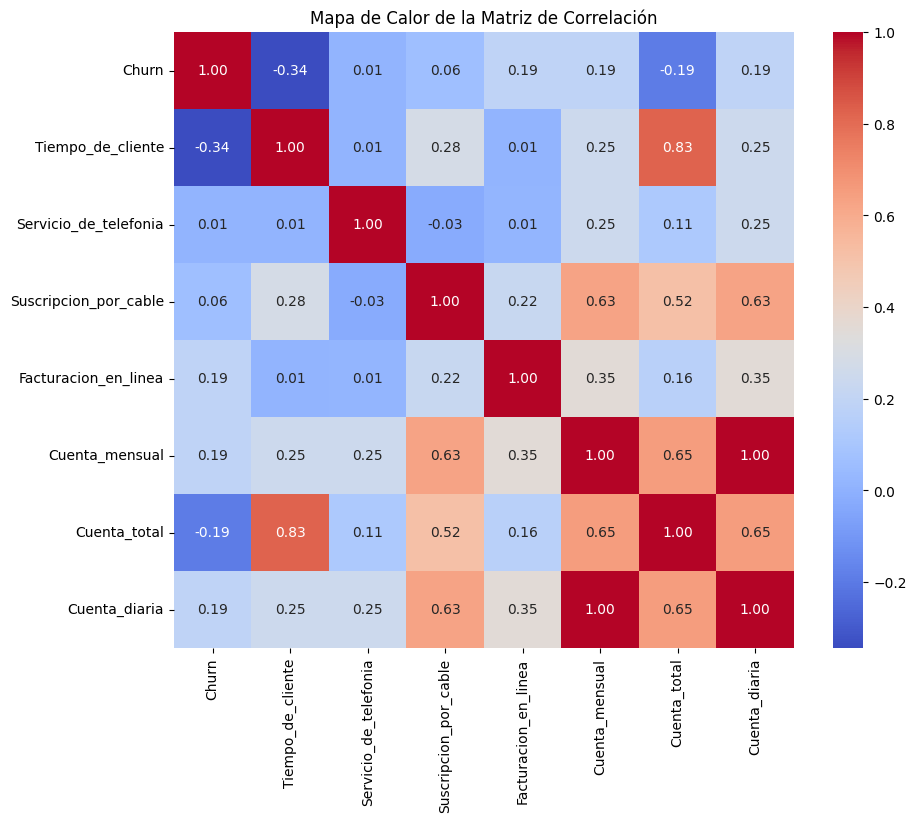

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

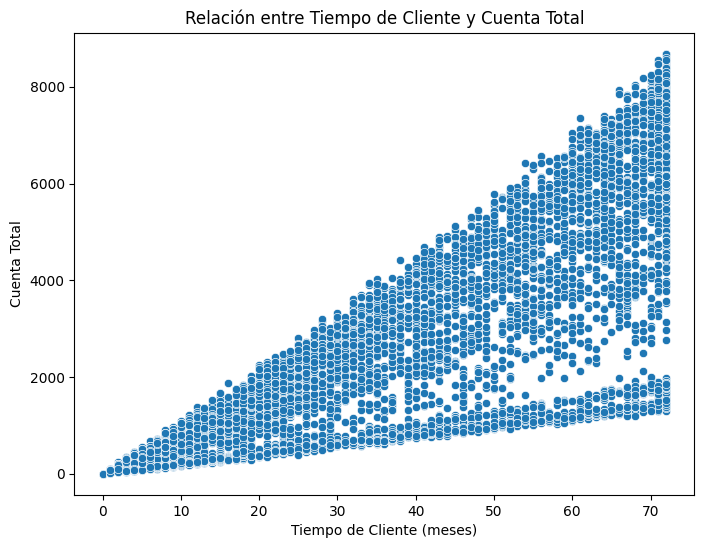

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Tiempo_de_cliente', y='Cuenta_total')
plt.title('Relación entre Tiempo de Cliente y Cuenta Total')
plt.xlabel('Tiempo de Cliente (meses)')
plt.ylabel('Cuenta Total')
plt.show()

In [12]:
df = df.drop(['Cuenta_diaria', 'Cuenta_total'], axis=1)

In [13]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns to encode:", categorical_cols)

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the head of the new DataFrame
display(df_encoded.head())

Categorical columns to encode: Index([], dtype='object')


,Churn,Tiempo_de_cliente,Servicio_de_telefonia,Suscripcion_por_cable,Facturacion_en_linea,Cuenta_mensual
0,False,9,True,True,True,65.6
1,False,9,True,False,False,59.9
2,True,4,True,False,True,73.9
3,True,13,True,True,True,98.0
4,True,3,True,True,True,83.9


In [14]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [15]:
# Calculate the value counts of the target variable y
churn_counts = y.value_counts()
print("Value counts of 'Churn':")
print(churn_counts)

# Calculate the proportion of each class in the target variable y
churn_proportions = y.value_counts(normalize=True) * 100
print("\nProportion of each class in 'Churn':")
print(churn_proportions)

Value counts of 'Churn':
Churn
False    5398
True     1869
Name: count, dtype: int64

Proportion of each class in 'Churn':
Churn
False    74.280996
True     25.719004
Name: proportion, dtype: float64


In [16]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display the new class distribution
print("New class distribution after SMOTE:")
print(y_resampled.value_counts())

New class distribution after SMOTE:
Churn
False    5398
True     5398
Name: count, dtype: int64


In [17]:
# Calculate the value counts of the resampled target variable y_resampled
resampled_churn_counts = y_resampled.value_counts()
print("Value counts of 'Churn' after SMOTE:")
print(resampled_churn_counts)

# Calculate the proportion of each class in the resampled target variable y_resampled
resampled_churn_proportions = y_resampled.value_counts(normalize=True) * 100
print("\nProportion of each class in 'Churn' after SMOTE:")
print(resampled_churn_proportions)

Value counts of 'Churn' after SMOTE:
Churn
False    5398
True     5398
Name: count, dtype: int64

Proportion of each class in 'Churn' after SMOTE:
Churn
False    50.0
True     50.0
Name: proportion, dtype: float64


,Churn,Tiempo_de_cliente,Servicio_de_telefonia,Suscripcion_por_cable,Facturacion_en_linea,Cuenta_mensual
Churn,1.000000,-0.344079,0.012571,0.062430,0.186666,0.189866
Tiempo_de_cliente,-0.344079,1.000000,0.010205,0.280738,0.007949,0.247982
Servicio_de_telefonia,0.012571,0.010205,1.000000,-0.025362,0.013624,0.246709
Suscripcion_por_cable,0.062430,0.280738,-0.025362,1.000000,0.224574,0.628874
Facturacion_en_linea,0.186666,0.007949,0.013624,0.224574,1.000000,0.353714
Cuenta_mensual,0.189866,0.247982,0.246709,0.628874,0.353714,1.000000


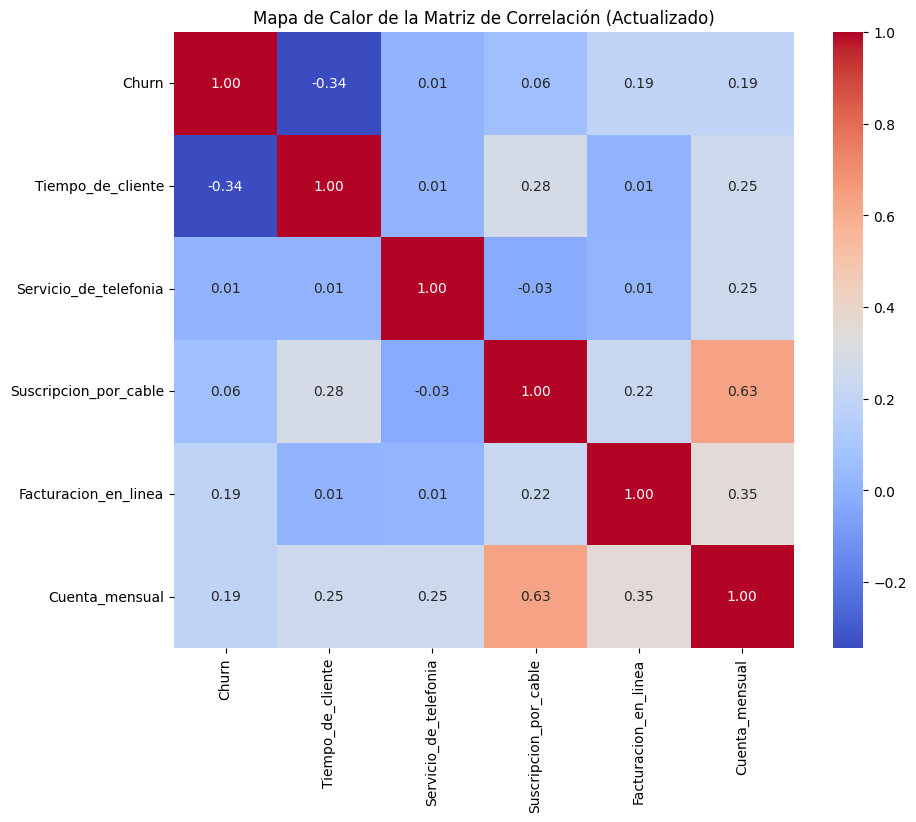

In [18]:
correlacion = df.corr()
display(correlacion)

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de la Matriz de Correlación (Actualizado)')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split as ttt

X, X_test, y, y_test = ttt(X, y, test_size=0.2, random_state=785, stratify=y)
X_train, X_val, y_train, y_val = ttt(X,y,stratify=y,random_state=785)

In [20]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(X_train,y_train)
dummy.score(X_test,y_test)

0.7427785419532325

In [21]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import MinMaxScaler

oversampling = SMOTE()
X_train_smote, y_train_smote = oversampling.fit_resample(X_train,y_train)
X_smote, y_smote = oversampling.fit_resample(X,y)

nearmiss = NearMiss(version=3)
X_train_nearmiss, y_train_nearmiss = nearmiss.fit_resample(X_train,y_train)
X_Nearmiss, y_Nearmiss = nearmiss.fit_resample(X,y)

normalizacion = MinMaxScaler()
X_normalizado = normalizacion.fit_transform(X)
X_normalizado_smote = normalizacion.fit_transform(X_smote)
X_normalizado_nearmiss = normalizacion.fit_transform(X_Nearmiss)
X_val_normalizado = normalizacion.fit_transform(X_val)
X_train_normalizado = normalizacion.fit_transform(X_train)
X_test_normalizado = normalizacion.fit_transform(X_test)
X_train_normalizado_smote = normalizacion.fit_transform(X_train_smote)
X_train_normalizado_nearmiss = normalizacion.fit_transform(X_train_nearmiss)

In [22]:
dummy = DummyClassifier()
dummy.fit(X_train_smote,y_train_smote)
dummy.score(X_test,y_test)

0.7427785419532325

In [24]:
dummy = DummyClassifier()
dummy.fit(X_train_nearmiss,y_train_nearmiss)
dummy.score(X_test,y_test)

0.7427785419532325

In [25]:
from sklearn.model_selection import StratifiedKFold, cross_validate

def val_cros (modelo,X_cros,y_cros):
  skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=785)
  cv_resultados = cross_validate(modelo,X_cros,y_cros,cv=skf,scoring='recall')
  return cv_resultados

def intervalo_confianza (resultados):
  promedio = resultados['test_score'].mean()
  desvio_std = resultados['test_score'].std()
  return f'El intervalo de confianza es: [{promedio-2*desvio_std}, {min(promedio+2*desvio_std,1)}]'

In [26]:
from sklearn.tree import DecisionTreeClassifier

modelo_arbol = DecisionTreeClassifier(random_state=785, max_depth=6)
modelo_arbol.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=785)

In [27]:
modelo_arbol.score(X_val,y_val)

0.7833562585969739

In [28]:
val_cros(modelo_arbol,X,y)

{'fit_time': array([0.01428509, 0.0169785 , 0.01380181, 0.01392579, 0.01402426]),
 'score_time': array([0.00979829, 0.00862551, 0.00859952, 0.00904393, 0.00884676]),
 'test_score': array([0.42809365, 0.49498328, 0.33779264, 0.38461538, 0.48829431])}

In [29]:
intervalo_confianza(val_cros(modelo_arbol,X,y))

'El intervalo de confianza es: [0.3063099302170181, 0.5472017754686007]'

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def matriz_confusion (modelo,X_val):
  y_previsto = modelo.predict(X_val)
  matr_conf = confusion_matrix(y_val,y_previsto)
  visualizacion = ConfusionMatrixDisplay(confusion_matrix=matr_conf,display_labels=['No cancela', 'Cancela'])
  visualizacion.plot();

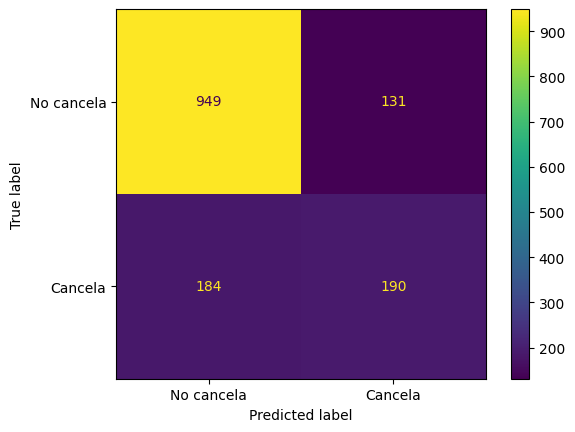

In [32]:
matriz_confusion(modelo_arbol,X_val)

In [33]:
from sklearn.model_selection import train_test_split

X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of X_test_resampled:", X_test_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)
print("Shape of y_test_resampled:", y_test_resampled.shape)

Shape of X_train_resampled: (8636, 5)
Shape of X_test_resampled: (2160, 5)
Shape of y_train_resampled: (8636,)
Shape of y_test_resampled: (2160,)


In [34]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
model = LogisticRegression(random_state=42)

print("Selected model: Logistic Regression")

Selected model: Logistic Regression


In [35]:
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

Accuracy: 0.7306
Precision: 0.7272
Recall: 0.7536
F1-score: 0.7402


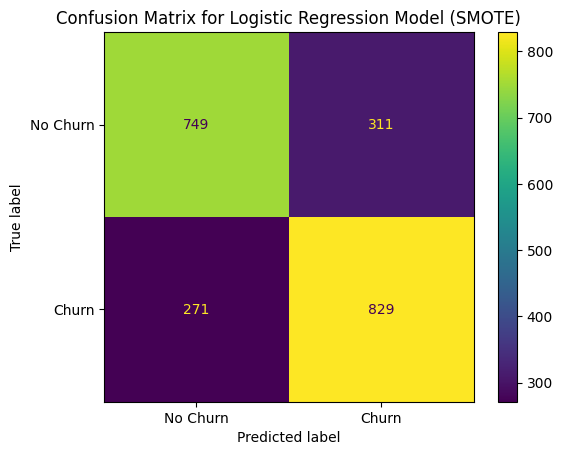

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Predict the target variable on the resampled test set
y_pred = model.predict(X_test_resampled)

# Calculate and print the evaluation metrics
accuracy = accuracy_score(y_test_resampled, y_pred)
precision = precision_score(y_test_resampled, y_pred)
recall = recall_score(y_test_resampled, y_pred)
f1 = f1_score(y_test_resampled, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Calculate the confusion matrix
cm = confusion_matrix(y_test_resampled, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot()
plt.title('Confusion Matrix for Logistic Regression Model (SMOTE)')
plt.show()